In [1]:
# %load my_init
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import font_manager




# import warnings
# warnings.filterwarnings('ignore')

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False


%matplotlib inline

In [2]:
df = pd.read_csv('data/student_10.csv', index_col='학번')
df

,학년,몸무게,키
학번,,,
1,1,60.2,154.0
2,1,50.2,174.5
3,1,68.8,177.0
4,2,59.0,167.5
5,2,70.9,182.0
6,2,76.5,170.5
7,3,66.6,171.5
8,3,86.2,187.0
9,3,66.0,178.0


인덱스 설정을 따로 안하거나 안보여도 항상 존재하는: range index 정수 인덱스  


행의 인덱스를 지정: implicit index 묵시적 인덱스


열의 columns 인덱스: expricit index 명시적 인덱스 

In [3]:
np.__version__

'1.23.5'

In [4]:
pd.__version__

'1.5.3'

In [5]:
# header='infer' 열의 인덱싱을 정해줄 수 있음 
# index_col=None 행의 인덱싱을 정해줄 수 있음
# na_values=None 결측치를 정해줄 수 있음
df_2 = pd.read_csv('data/student_10_2.csv',header=None)
df_2

,0,1,2,3
0,1,1,60.2,154.0
1,2,1,50.2,174.5
2,3,1,68.8,177.0
3,4,2,59.0,167.5
4,5,2,70.9,182.0
5,6,2,76.5,170.5
6,7,3,66.6,171.5
7,8,3,86.2,187.0
8,9,3,66.0,178.0
9,10,3,77.4,172.5


In [6]:
df['몸무게']  # series 객채로 변함 인덱스레인지 + 넌파이배열  아레에는 인덱스 이름과 데이터 타입이 적혀있음

학번
1     60.2
2     50.2
3     68.8
4     59.0
5     70.9
6     76.5
7     66.6
8     86.2
9     66.0
10    77.4
Name: 몸무게, dtype: float64

In [7]:
df.몸무게    # 컬럼도 프로포티다. 

학번
1     60.2
2     50.2
3     68.8
4     59.0
5     70.9
6     76.5
7     66.6
8     86.2
9     66.0
10    77.4
Name: 몸무게, dtype: float64

In [8]:
def get_bmi(bmi_score):
    if bmi_score < 18.5:
        return '저체중'
    elif bmi_score <= 23:
        return '정상'
    elif bmi_score <= 25:
        return '과체중'
    else:
        return '비만'

In [9]:
# numpy를 기반으로 하고 있어 roof가 없이 작동함.
# 함수를 쓰는경우 nominal이나 ordinal을 원하는 데로 만들 수 있음.
df['BMI점수'] = np.round(df['몸무게'] / np.power(df['키'] / 100 , 2), 2)
df['BMI등급'] = df['BMI점수'].apply(get_bmi)    # python의 map()과 같은 작동을 함.
df

,학년,몸무게,키,BMI점수,BMI등급
학번,,,,,
1,1,60.2,154.0,25.38,비만
2,1,50.2,174.5,16.49,저체중
3,1,68.8,177.0,21.96,정상
4,2,59.0,167.5,21.03,정상
5,2,70.9,182.0,21.40,정상
6,2,76.5,170.5,26.32,비만
7,3,66.6,171.5,22.64,정상
8,3,86.2,187.0,24.65,과체중
9,3,66.0,178.0,20.83,정상


##### cut: 연속형(numeric)을 이산형(cateforial, 범주형)으로 반꾸어 주는 함수
##### 범주형은 명목형(nominal ex.혈액형) 그리고 순서형(ordinal ex.성적 등급, 상 중 하)이 있음
##### 별점과같이 연속형과 범주형 둘다 해당하는 경우도 있음. 원하는 데로 선택해서 사용.

In [10]:
# right=False를 해야 이상,미만을 사용함. 기본은 초과,이하(개구간 설정)
pd.cut(df['BMI점수'], bins=[0, 18.5, 23, 25, 100], right=False)

학번
1     [25.0, 100.0)
2       [0.0, 18.5)
3      [18.5, 23.0)
4      [18.5, 23.0)
5      [18.5, 23.0)
6     [25.0, 100.0)
7      [18.5, 23.0)
8      [23.0, 25.0)
9      [18.5, 23.0)
10    [25.0, 100.0)
Name: BMI점수, dtype: category
Categories (4, interval[float64, left]): [[0.0, 18.5) < [18.5, 23.0) < [23.0, 25.0) < [25.0, 100.0)]

In [11]:
# BMI등급은 ordinal데이터이다.(일정한 간격이 아니라서)
df['BMI등급'] = pd.cut(df['BMI점수'], bins=[0, 18.5, 23, 25, 100], labels=['저체중','정상','과체중','비만'], right=False)
df

,학년,몸무게,키,BMI점수,BMI등급
학번,,,,,
1,1,60.2,154.0,25.38,비만
2,1,50.2,174.5,16.49,저체중
3,1,68.8,177.0,21.96,정상
4,2,59.0,167.5,21.03,정상
5,2,70.9,182.0,21.40,정상
6,2,76.5,170.5,26.32,비만
7,3,66.6,171.5,22.64,정상
8,3,86.2,187.0,24.65,과체중
9,3,66.0,178.0,20.83,정상


In [12]:
df.columns

Index(['학년', '몸무게', '키', 'BMI점수', 'BMI등급'], dtype='object')

In [13]:
df.columns[0:-1]

Index(['학년', '몸무게', '키', 'BMI점수'], dtype='object')

In [14]:
df_2 = df[df.columns[0:-1]]
df_2

,학년,몸무게,키,BMI점수
학번,,,,
1,1,60.2,154.0,25.38
2,1,50.2,174.5,16.49
3,1,68.8,177.0,21.96
4,2,59.0,167.5,21.03
5,2,70.9,182.0,21.40
6,2,76.5,170.5,26.32
7,3,66.6,171.5,22.64
8,3,86.2,187.0,24.65
9,3,66.0,178.0,20.83


In [15]:
df_3 = df[['학년', '키','BMI점수']]
df_3

,학년,키,BMI점수
학번,,,
1,1,154.0,25.38
2,1,174.5,16.49
3,1,177.0,21.96
4,2,167.5,21.03
5,2,182.0,21.40
6,2,170.5,26.32
7,3,171.5,22.64
8,3,187.0,24.65
9,3,178.0,20.83


# heading1
## heading2
### heading3
#### heading4
##### heading5

* 1st
* 2st
* 3st

1. 1st
2. 2nd
3. 3rd  

1. 1st

백터는 $x=(x_{1}, x_{2}, \cdots, x_{n})$생겼습니다.
$$x=(x_{1}, x_{2}, \cdots, x_{n})$$

In [16]:
df.iloc[3:5, 3:5] # 묵시적 인덱서 - 슬라이싱

,BMI점수,BMI등급
학번,,
4,21.03,정상
5,21.40,정상


In [17]:
df.loc[[4,6],['BMI점수', 'BMI등급']]     #명시적 인덱스 
# df.ilco[[3,5],[3,4]] 묵시적 인덱스로 같은표현

,BMI점수,BMI등급
학번,,
4,21.03,정상
6,26.32,비만


In [18]:
df.loc[4:5, 'BMI점수':'BMI등급']    #명시적 인덱스를 사용하면 끝나는 인덱스 또한 들어간다. -> 이름을 사용했음으로 포함인듯 

,BMI점수,BMI등급
학번,,
4,21.03,정상
5,21.40,정상


In [19]:
df['BMI점수'] >= 25 #불리언 벡터

학번
1      True
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: BMI점수, dtype: bool

In [20]:
type(df['BMI점수'])

pandas.core.series.Series

In [21]:
df.loc[:, ['BMI점수']]    #데이타 프레임 형식

,BMI점수
학번,
1,25.38
2,16.49
3,21.96
4,21.03
5,21.40
6,26.32
7,22.64
8,24.65
9,20.83


In [22]:
df.loc[:, 'BMI점수']    # 시리즈 형식

학번
1     25.38
2     16.49
3     21.96
4     21.03
5     21.40
6     26.32
7     22.64
8     24.65
9     20.83
10    26.01
Name: BMI점수, dtype: float64

In [23]:
df.loc[:, 'BMI점수'].shape    # 행백터로 나옴 머신런닝할때 열백터를 사용해야함,

(10,)

In [24]:
df.loc[:, ['BMI점수']].shape    # 열백터로 반환 fancy index를 사용해야하는 이유

(10, 1)

In [25]:
df.loc[:, ['BMI점수']] .ndim

2

In [26]:
df.iloc[0]    # 행만 꺼내와도 시리즈가 나옴 

학년           1
몸무게       60.2
키        154.0
BMI점수    25.38
BMI등급       비만
Name: 1, dtype: object

In [27]:
df.iloc[[0]]    # DF로 보고싶으면 [[]]을 사용. 2차원 구조임 

,학년,몸무게,키,BMI점수,BMI등급
학번,,,,,
1,1,60.2,154.0,25.38,비만


In [28]:
df.iloc[:, [True, False, True, False, True]]    # 불형을 통해서 가능

,학년,키,BMI등급
학번,,,
1,1,154.0,비만
2,1,174.5,저체중
3,1,177.0,정상
4,2,167.5,정상
5,2,182.0,정상
6,2,170.5,비만
7,3,171.5,정상
8,3,187.0,과체중
9,3,178.0,정상


In [29]:
df.iloc[:, lambda df: [0, 2, 4]]    # 람다식을 이용도 가능

,학년,키,BMI등급
학번,,,
1,1,154.0,비만
2,1,174.5,저체중
3,1,177.0,정상
4,2,167.5,정상
5,2,182.0,정상
6,2,170.5,비만
7,3,171.5,정상
8,3,187.0,과체중
9,3,178.0,정상


In [30]:
df.iloc[lambda x: x.index % 2 == 0, :]     # x는 df임, 인덱서는 1번부터 진행됨.

,학년,몸무게,키,BMI점수,BMI등급
학번,,,,,
2,1,50.2,174.5,16.49,저체중
4,2,59.0,167.5,21.03,정상
6,2,76.5,170.5,26.32,비만
8,3,86.2,187.0,24.65,과체중
10,3,77.4,172.5,26.01,비만


In [31]:
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(10, 5)
10
5


In [32]:
df.info()    # 데이터의 상태를 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학년      10 non-null     int64   
 1   몸무게     10 non-null     float64 
 2   키       10 non-null     float64 
 3   BMI점수   10 non-null     float64 
 4   BMI등급   10 non-null     category
dtypes: category(1), float64(3), int64(1)
memory usage: 914.0 bytes


In [33]:
df.iloc[:,1:3].describe()    # 요약 통계량 

,몸무게,키
count,10.000000,10.00000
mean,68.180000,173.45000
std,10.355975,8.93324
min,50.200000,154.00000
25%,61.650000,170.75000
50%,67.700000,173.50000
75%,75.100000,177.75000
max,86.200000,187.00000


In [34]:
df = pd.read_csv('data/scores_50.csv', index_col='학번')
df.head()

,영어,수학
학번,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


대표값: 데이터를 하나의 값으로 요약한 지표

평균(기대값) mean

중앙값 median

최빈값 mode

3개의 값이 비슷하면 중앙으로 고루 모여있다는 뜻.

In [35]:
scores = df.loc[1:10,'영어'].to_numpy()
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [36]:
list('abc')

['a', 'b', 'c']

In [37]:
scores_df = pd.DataFrame({'score' : scores}, index=pd.Index(list('ABCDEFGHIJ'), name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [38]:
scores_df.mean()    # 평균값

score    55.0
dtype: float64

In [39]:
df.mean()    # 2개 이상의 열이 있는 데이터를 평균을 구하면 그 값은 시리즈로 나옴

영어    58.38
수학    78.88
dtype: float64

In [40]:
scores_df.median()    # 중앙값

score    56.5
dtype: float64

In [41]:
pd.Series(list('123334445')).mode()    # 최빈값

0    3
1    4
dtype: object

sum()은 axis=0임으로 인덱스 축 방향으로 전부 더한다.

axis=1을 하면 컬럼축 방향으로 더한다.

In [42]:
df.sum()

영어    2919
수학    3944
dtype: int64

In [43]:
df['총점'] = df.sum(axis=1)
df.head()

,영어,수학,총점
학번,,,
1,42,65,107
2,69,80,149
3,56,63,119
4,41,63,104
5,57,76,133


In [44]:
df['편차'] = df['총점']-df['총점'].mean()
df['편차^2'] = np.power(df['편차'], 2)

print(f"{df['편차^2'].sum() / df.shape[0]:.3f}")
print(f"{df['편차^2'].sum() / (df.shape[0] - 1):.3f}")
df.head()

280.472
286.196


,영어,수학,총점,편차,편차^2
학번,,,,,
1,42,65,107,-30.26,915.6676
2,69,80,149,11.74,137.8276
3,56,63,119,-18.26,333.4276
4,41,63,104,-33.26,1106.2276
5,57,76,133,-4.26,18.1476


var()은 ddof=1이 기본값,

to_numpy().var()은 ddof=0이 기본값이다

ddof=0은 불편분산 ddof=1은 표본분산(또는 N이면 모분산)이다.

In [45]:
print(f"{df['총점'].var():.3f}")
print(f"{df['총점'].to_numpy().var():.3f}")
print(f"{df['총점'].to_numpy().var(ddof=1):.3f}")

286.196
280.472
286.196


std()도 var()처럼 pandas는 ddof=1이, numpy는 ddof=0이 기본값이다

In [46]:
df.loc[:,['영어','수학','총점']].std(axis=0)

영어     9.799813
수학     8.414371
총점    16.917338
dtype: float64

In [47]:
np.std(df.loc[:,['영어','수학','총점']], ddof=1, axis=0)

영어     9.799813
수학     8.414371
총점    16.917338
dtype: float64

In [48]:
df.loc[:,['영어','수학','총점']].std(axis='index')

영어     9.799813
수학     8.414371
총점    16.917338
dtype: float64

In [49]:
df.loc[:,['영어','수학','총점']].std(axis='columns').head()

학번
1    32.959571
2    43.362810
3    34.530180
4    31.973948
5    39.551654
dtype: float64

In [50]:
# 범위 최대값 - 최소값
np.max(df['총점'])-np.min(df['총점'])

74

apply()는 함수를 전달해주는 함수로 전달할 함수와 어떤 축에 적용할지를 설정할 수 있다.

In [51]:
df.loc[:, ['영어','수학','총점']].apply(lambda x: np.max(x) - np.min(x), axis=0)

영어    42
수학    37
총점    74
dtype: int64

In [52]:
df['총점'].describe()

count     50.000000
mean     137.260000
std       16.917338
min       94.000000
25%      129.250000
50%      139.000000
75%      147.750000
max      168.000000
Name: 총점, dtype: float64

하위 25%  50%  75%를 Q1 Q2 Q3로 정의하고 Q3 - Q1 = IQR을 구해 fance를 구한다.

In [53]:
# 백분위수 (0~100)
Q = np.percentile(df['총점'], [25, 75])
Q1 = Q[0]
Q3 = Q[1]
IQR = Q3- Q1
IQR

18.5

In [54]:
# 분위수 (0~1)
Q = np.quantile(df['총점'], [0.25, 0.75])
Q1 = Q[0]
Q3 = Q[1]
IQR = Q3- Q1
IQR

18.5

In [55]:
# 아웃라이너 검출
outlier_cond = (df['총점'] > Q3 + 1.5 * IQR) | (df['총점'] < Q1 - 1.5 * IQR)
df.loc[outlier_cond]

,영어,수학,총점,편차,편차^2
학번,,,,,
35,37,57,94,-43.26,1871.4276


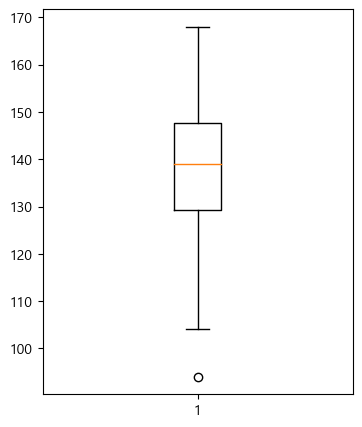

In [56]:
# 박스플롯
fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df['총점'])

plt.show()

### 표준화

-정규화

In [57]:
z = (df['총점'] - df['총점'].mean()) / df['총점'].std()
z.head()

학번
1   -1.788697
2    0.693963
3   -1.079366
4   -1.966030
5   -0.251813
Name: 총점, dtype: float64

-min-max 표준화

In [58]:
mms = (df['총점'] - df['총점'].min()) / (df['총점'].max() - df['총점'].min())
mms.head()

학번
1    0.175676
2    0.743243
3    0.337838
4    0.135135
5    0.527027
Name: 총점, dtype: float64

map()을 iterable객체를 funotion을 적용, 라벨링 하여 집계할떄 사용.

# 도수분포
freq: 빈도 수 

bin_edges: 구간의 간격

histogram(데이터, bins=, range=)

bins=: 구간의 수

range=: 구간의 범위 

In [59]:
freq, bin_edges = np.histogram(df['영어'], bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [60]:
bin_edges    #실수여서 .이 붙어있음

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [61]:
#정수로 변환
bin_edges = list(map(int, bin_edges))
bin_edges

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [62]:
score_class = [f'{i:>2} ~ {i+10}' for i in bin_edges[0:10]]
score_class

[' 0 ~ 10',
 '10 ~ 20',
 '20 ~ 30',
 '30 ~ 40',
 '40 ~ 50',
 '50 ~ 60',
 '60 ~ 70',
 '70 ~ 80',
 '80 ~ 90',
 '90 ~ 100']

In [63]:
class_value = [(i + (i + 10)) // 2 for i in bin_edges[0:10]]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [64]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [65]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [71]:
freq_df = pd.DataFrame({'계급값': class_value, '빈도':freq, '상대도수':rel_freq, '누적상대도수':cum_rel_freq},
                       index=pd.Index(score_class, name='계급'))
freq_df

,계급값,빈도,상대도수,누적상대도수
계급,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


In [73]:
freq_df['빈도'].idxmax()

'60 ~ 70'

In [75]:
freq_df.loc[[freq_df['빈도'].idxmax()],:]

,계급값,빈도,상대도수,누적상대도수
계급,,,,
60 ~ 70,65,18,0.36,0.88


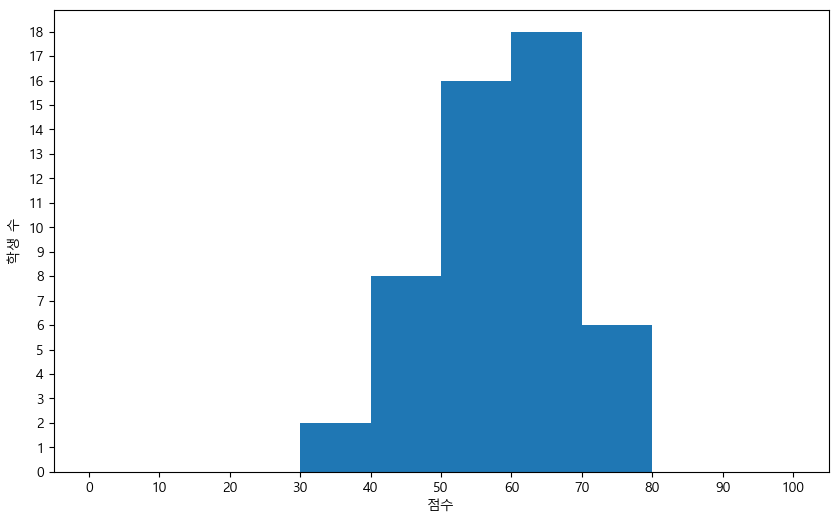

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

freq, *_ = ax.hist(df['영어'], bins=10, range=(0, 100))

ax.set_xlabel('점수')
ax.set_ylabel('학생 수')
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

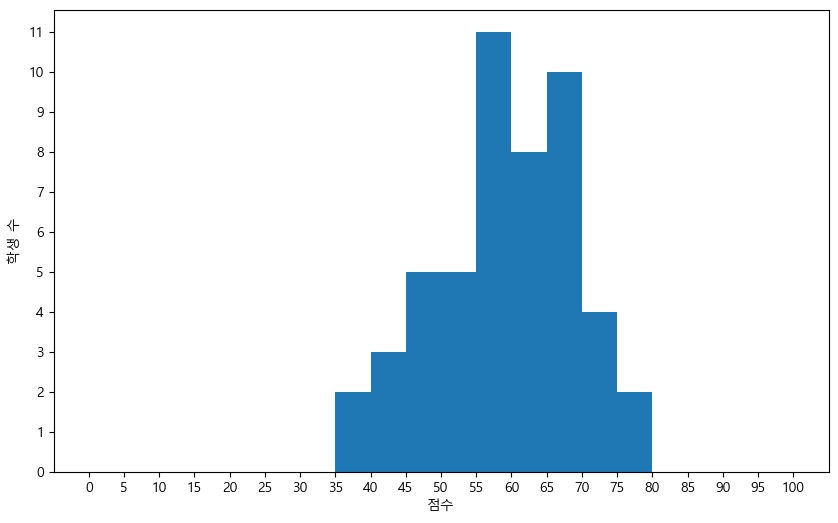

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

freq, *_ = ax.hist(df['영어'], bins=20, range=(0, 100))

ax.set_xlabel('점수')
ax.set_ylabel('학생 수')
ax.set_xticks(np.linspace(0, 100, 21))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

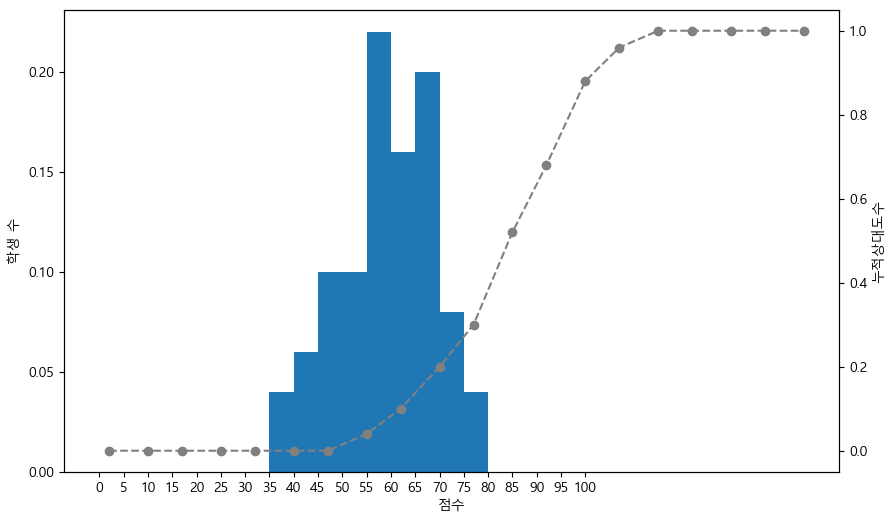

In [82]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

weights = np.ones_like(df['영어']) / df['영어'].shape[0]
freq, *_ = ax1.hist(df['영어'], bins=20, range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(freq)
class_value = [i+(i+5) // 2 for i in range(0,100,5)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

ax1.set_xlabel('점수')
ax1.set_ylabel('학생 수')
ax2.set_ylabel('누적상대도수')
ax1.set_xticks(np.linspace(0, 100, 21))


plt.show()